In [15]:
import pandas as pd
import numpy as np
import jupyter
import matplotlib as plt

## Exercise 1: Concatenate

In [12]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 1], ['d', 2]], columns=['letter', 'number'])

result = pd.concat([df1, df2], axis=0, ignore_index=True)

result

,letter,number
0,a,1
1,b,2
2,c,1
3,d,2


## Exercise 2: Merge

In [15]:
df1_dict = {
        'id': ['1', '2', '3', '4', '5'],
        'Feature1': ['A', 'C', 'E', 'G', 'I'],
        'Feature2': ['B', 'D', 'F', 'H', 'J']}

df1 = pd.DataFrame(df1_dict, columns = ['id', 'Feature1', 'Feature2'])

#df2
df2_dict = {
        'id': ['1', '2', '6', '7', '8'],
        'Feature1': ['K', 'M', 'O', 'Q', 'S'],
        'Feature2': ['L', 'N', 'P', 'R', 'T']}

df2 = pd.DataFrame(df2_dict, columns = ['id', 'Feature1', 'Feature2'])

result1 = pd.merge(df1, df2, on='id', how='inner')

result1


,id,Feature1_x,Feature2_x,Feature1_y,Feature2_y
0,1,A,B,K,L
1,2,C,D,M,N


In [19]:
result2 = pd.merge(df1, df2, on='id', how='outer', suffixes=('_df1', '_df2'))

result2


,id,Feature1_df1,Feature2_df1,Feature1_df2,Feature2_df2
0,1,A,B,K,L
1,2,C,D,M,N
2,3,E,F,NaN,NaN
3,4,G,H,NaN,NaN
4,5,I,J,NaN,NaN
5,6,NaN,NaN,O,P
6,7,NaN,NaN,Q,R
7,8,NaN,NaN,S,T


## Exercise 3: Merge MultiIndex

In [48]:
#generate days
all_dates = pd.date_range('2021-01-01', '2021-12-15')
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')

#generate tickers
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

#create indexs
index_alt = pd.MultiIndex.from_product([all_dates, tickers], names=['Date', 'Ticker'])
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# create DFs
market_data = pd.DataFrame(index=index,
                        data=np.random.randn(len(index), 3),
                        columns=['Open','Close','Close_Adjusted'])

alternative_data = pd.DataFrame(index=index_alt,
                                data=np.random.randn(len(index_alt), 2),
                                columns=['Twitter','Reddit'])



merged_data = market_data.merge(alternative_data, how='left', left_index=True, right_index=True)

merged_data





Open     Close  Close_Adjusted   Twitter    Reddit
Date       Ticker                                                        
2021-01-01 AAPL    1.113936 -0.722057        0.011314  0.683161  0.784594
           FB      0.290384  0.102420       -0.388440  1.344098 -0.904354
           GE     -1.138643 -0.206572       -0.162795  0.520726 -0.281562
           AMZN    0.406036  0.007822       -0.432187 -0.060599 -1.289603
           DAI    -0.877013 -0.709613        0.554181 -1.277865 -1.482700
...                     ...       ...             ...       ...       ...
2021-12-31 AAPL   -1.026396  2.016795       -0.997521       NaN       NaN
           FB      1.025014 -1.251381        2.600108       NaN       NaN
           GE      0.392770  0.361377       -1.153242       NaN       NaN
           AMZN    1.145358 -0.573076        0.953721       NaN       NaN
           DAI    -0.022588  1.978547        1.635909       NaN       NaN

[1305 rows x 5 columns]

In [50]:
merged_data.fillna(0, inplace=True)
missing_data_counts = merged_data.isnull().sum()
print(missing_data_counts)

Open              0
Close             0
Close_Adjusted    0
Twitter           0
Reddit            0
dtype: int64


## Exercise 4: Groupby Apply

In [66]:
import pandas as pd
import numpy as np

def winsorize(df, quantiles):
    q_low, q_high = np.percentile(df, [quantiles[0] * 100, quantiles[1] * 100])
    
    df_clipped = df.clip(lower=q_low, upper=q_high, axis=1)
    
    return df_clipped

# Example DataFrame
df = pd.DataFrame(range(1, 11), columns=['sequence'])

# Apply the winsorize function
winsorized_df = winsorize(df, [0.20, 0.80])


df = pd.DataFrame(range(1,11), columns=['sequence'])
print(winsorize(df, [0.20, 0.80]).to_markdown())


|    |   sequence |
|---:|-----------:|
|  0 |        2.8 |
|  1 |        2.8 |
|  2 |        3   |
|  3 |        4   |
|  4 |        5   |
|  5 |        6   |
|  6 |        7   |
|  7 |        8   |
|  8 |        8.2 |
|  9 |        8.2 |


In [69]:
def winsorize(df, quantiles):
    q_low, q_high = np.percentile(df, [quantiles[0] * 100, quantiles[1] * 100])
    
    df_clipped = df.clip(lower=q_low, upper=q_high, axis=1)
    
    return df_clipped

# Example DataFrame
groups = np.concatenate([np.ones(10), np.ones(10)+1,  np.ones(10)+2, np.ones(10)+3, np.ones(10)+4])

df = pd.DataFrame(data= zip(groups,
                            range(1,51)),
                columns=["group", "sequence"])

# Apply the winsorize function
df = df.groupby("group")[['sequence']].apply(winsorize, [0.05,0.95])
df = result_df.reset_index(drop=True)

display(df.head(11))


,sequence
0,1.45
1,2.00
2,3.00
3,4.00
4,5.00
5,6.00
6,7.00
7,8.00
8,9.00
9,9.55


## Exercise 5: Groupby Agg

In [80]:
data = {
    'value': [20.45, 22.89, 32.12, 111.22, 33.22, 100, 99.99],
    'product': ['table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']
}
df = pd.DataFrame(data)
display(df)
# Compute min, max, and mean price for each product
result = df.groupby('product')['value'].agg(['min', 'max', 'mean']).reset_index()

result.columns = ['product', "('value', 'min')", "('value', 'max')", "('value', 'mean')"]

print("-------result-------")
display(result)


,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table
5,100.00,mobile phone
6,99.99,table


-------result-------


,product,"('value', 'min')","('value', 'max')","('value', 'mean')"
0,chair,22.89,32.12,27.505
1,mobile phone,100.00,111.22,105.610
2,table,20.45,99.99,51.220


## Exercise 6: Unstack

In [13]:
# Create the DataFrame as specified
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])
market_data = pd.DataFrame(index=index, data=np.random.randn(len(index), 1), columns=['Prediction'])

# Unstack the DataFrame
unstacked_market_data = market_data.unstack(level='Ticker')

# Display the first 3 rows
display_df = unstacked_market_data.head(3)

unstacked_market_data.columns = unstacked_market_data.columns.droplevel()  # Drop the top level ('Prediction')


display(display_df)


Prediction                                        
Ticker           AAPL      AMZN       DAI        FB        GE
Date                                                         
2021-01-01  -1.546391  0.448597  1.327499  0.507283 -1.261320
2021-01-04   0.150171 -1.088701 -0.336242 -0.706750 -0.456620
2021-01-05   0.308849 -0.257225  0.030288 -0.323717  0.294377

<Axes: title={'center': 'Unstack'}, xlabel='Date'>

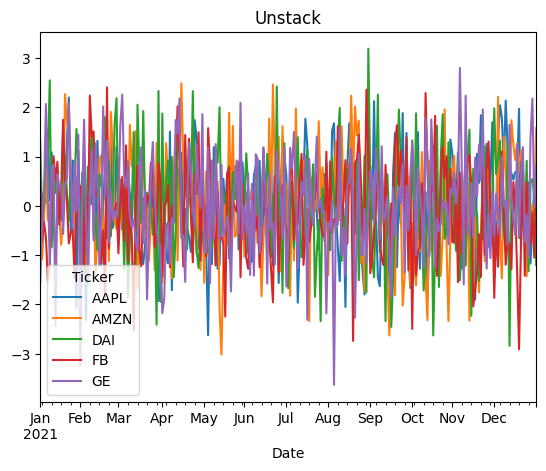

In [19]:
unstacked_market_data.plot(title = 'Unstack')